In [10]:
import sys
sys.path.append('C:/Users/Lexmi/Dropbox/Archive/University/7sem/Data management and visualisation/Foody')
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np
import statistics
import importlib.util
from foody_scraper.src.database.mongo import Mongo
from bson import ObjectId
from foody_scraper.src.database.good_combination_dao import GoodCombinationDao
from pprint import pprint
from foody_scraper.src.data_analysis.apriori_analyser import AprioriAnalyser


client = MongoClient('localhost', 27017)
mongo = Mongo()
db = client['foody']
recipes = mongo.find_all()
for recipe in db.recipes.find({}):
    recipes.append(recipe)

In [2]:
print("Number of recipes:", len(recipes))
averageNumberOfSteps = statistics.mean(map(lambda recipe: len(recipe['recipe_steps']), recipes))
print("Average number of steps:", averageNumberOfSteps)

Number of recipes: 19424
Average number of steps: 4.9417215815486


0 recipes with missing nutrients info deleted
Average energy (kkal): 666.8168245469523



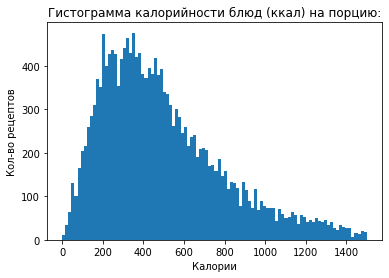

In [3]:
d = 0
for recipe in recipes:
    if (len(recipe['nutritions']) < 4):
        d = d + mongo.db.recipes.delete_one({'_id': recipe['_id']})
print(d, "recipes with missing nutrients info deleted")

energy = list(map(lambda recipe: recipe['nutritions'][0]['measure']['amount'], recipes))
averageEnergy = statistics.mean(map(lambda recipe: recipe['nutritions'][0]['measure']['amount'], recipes))
print("Average energy (kkal):", averageEnergy)
print()


plt.hist(energy, 100, range=(1, 1500))
plt.title("Гистограмма калорийности блюд (ккал) на порцию:")
plt.xlabel('Калории')
plt.ylabel('Кол-во рецептов')
plt.show()

Average proteins (grams): 26.77664744645799



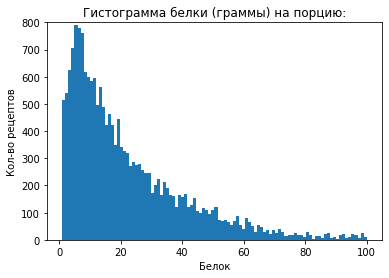

In [4]:
prot = lambda recipe: recipe['nutritions'][1]['measure']['amount']
energy = list(map(prot, recipes))
averageProtein = statistics.mean(map(prot, recipes))
print("Average proteins (grams):", averageProtein)
print()

plt.hist(energy, 100, range=(1, 100))
plt.ylim(0, 800)
plt.title("Гистограмма белки (граммы) на порцию:")
plt.xlabel('Белок')
plt.ylabel('Кол-во рецептов')
plt.show()

Average fats (grams): 39.10288303130148



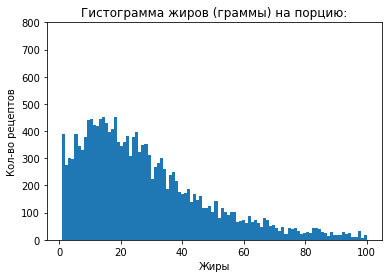

In [5]:
fat = lambda recipe: recipe['nutritions'][2]['measure']['amount']
energy = list(map(fat, recipes))
averageFats = statistics.mean(map(fat, recipes))
print("Average fats (grams):", averageFats)
print()

plt.hist(energy, 100, range=(1, 100))
plt.ylim(0, 800)
plt.title("Гистограмма жиров (граммы) на порцию:")
plt.xlabel('Жиры')
plt.ylabel('Кол-во рецептов')
plt.show()

Average carbs (grams): 54.485523064250415



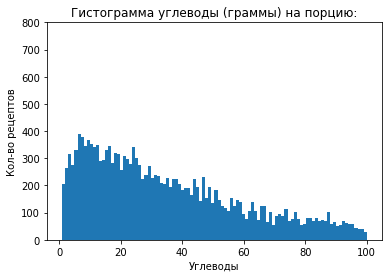

In [6]:
carb = lambda recipe: recipe['nutritions'][3]['measure']['amount']
energy = list(map(carb, recipes))
averageCarbs = statistics.mean(map(carb, recipes))
print("Average carbs (grams):", averageCarbs)
print()

plt.hist(energy, 100, range=(1, 100))
plt.ylim(0, 800)
plt.title("Гистограмма углеводы (граммы) на порцию:")
plt.xlabel('Углеводы')
plt.ylabel('Кол-во рецептов')
plt.show()

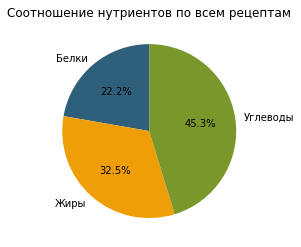

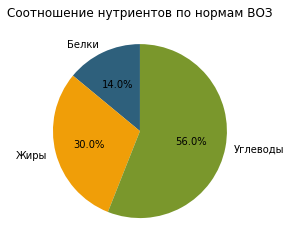

In [7]:
plt.pie([averageProtein, averageFats, averageCarbs], colors=['#2e607c', '#f09e08', '#7a972c'], labels=['Белки','Жиры','Углеводы'],autopct='%1.1f%%', startangle=90)
plt.title("Соотношение нутриентов по всем рецептам")
plt.show()

plt.pie([14, 30, 56], labels=['Белки','Жиры','Углеводы'],colors=['#2e607c', '#f09e08', '#7a972c'], autopct='%1.1f%%', startangle=90)
plt.title(f"Соотношение нутриентов по нормам ВОЗ")
plt.show()

UNPREDICTABLE TIME 2 суток
UNPREDICTABLE TIME 2 суток


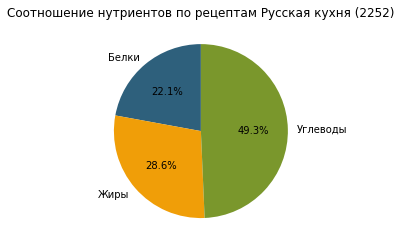

UNPREDICTABLE TIME 1 сутки
UNPREDICTABLE TIME 1 сутки
UNPREDICTABLE TIME 1 сутки
UNPREDICTABLE TIME 1 сутки


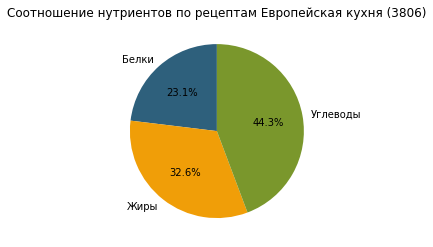

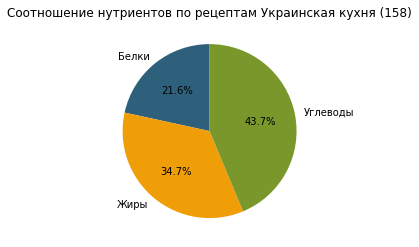

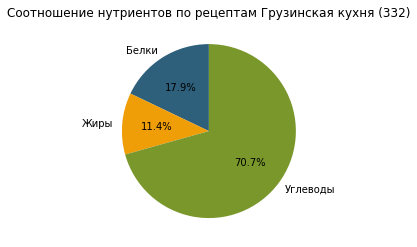

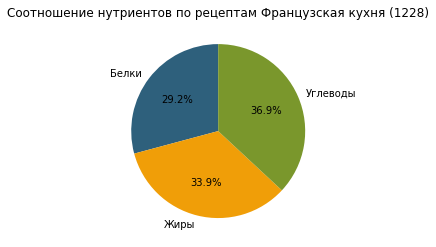

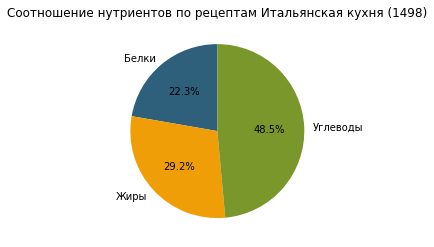

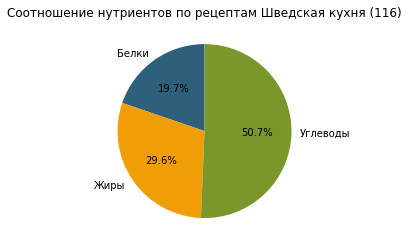

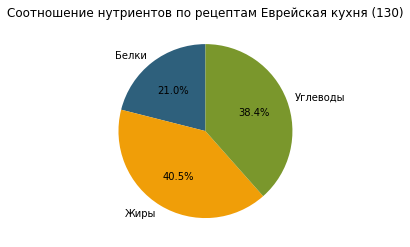

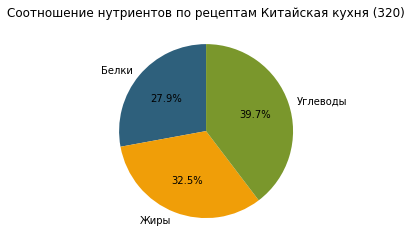

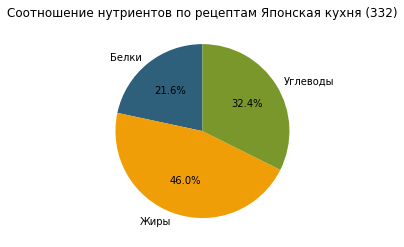

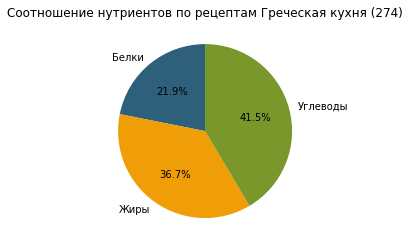

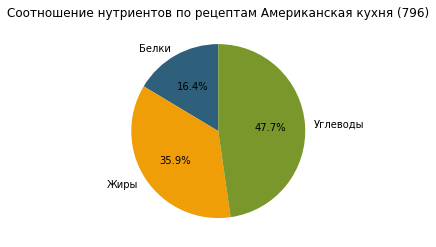

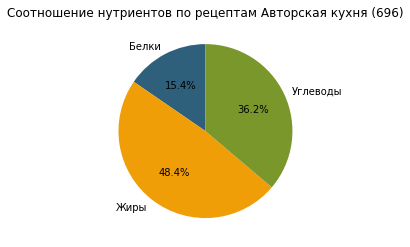

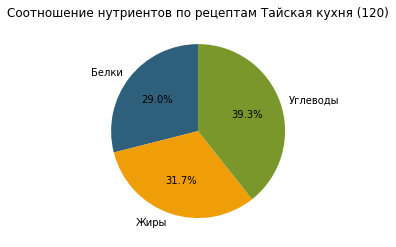

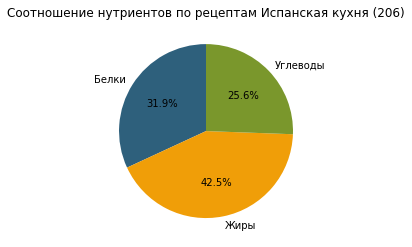

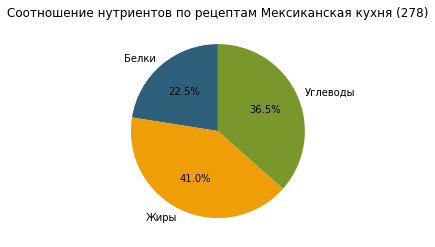

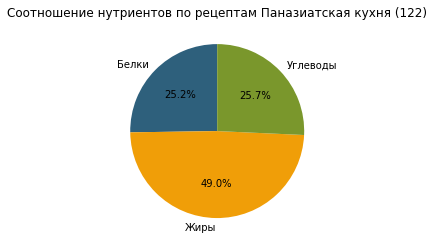

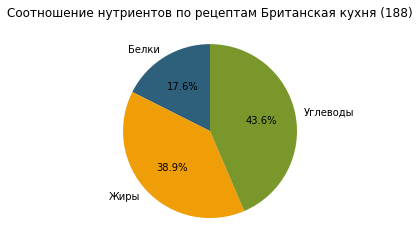

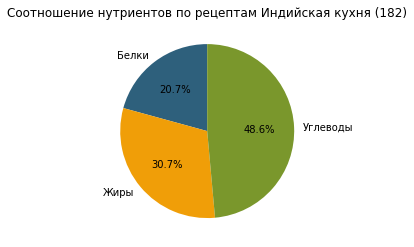

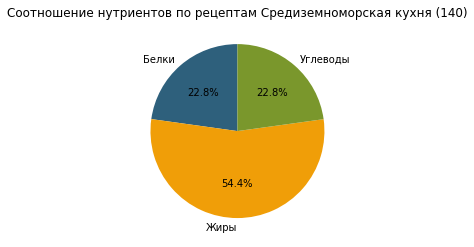

In [8]:
cuisines = dict()
for recipe in recipes:
    for tag in recipe['tags']:
        if 'кухня' in tag:
            if tag not in cuisines:
                cuisines[tag] = []    
            cuisines[tag].append(recipe)
            

def parse_time(str):
    hours = 0
    minutes = 0
    if 'час' in str:
        hours = str.split(' ')[0]
        if 'минут' in str:
            minutes = str.split(' ')[2]
    elif 'минут' in str:
        minutes = str.split(' ')[0]
    else:
        print(f'UNPREDICTABLE TIME {str}')
        hours = 1
    return int(hours) * 60 + int(minutes)

time_p = lambda recipe: parse_time(recipe['time'])


time = []
for key, value in cuisines.items():
    if (len(value) > 100):
        averageProtein = statistics.mean(map(prot, value))
        averageCarbs = statistics.mean(map(carb, value))
        averageFats = statistics.mean(map(fat, value))
        time.append((statistics.mean(map(time_p, value)), key))
        plt.pie([averageProtein, averageFats, averageCarbs], labels=['Белки','Жиры','Углеводы'],colors=['#2e607c', '#f09e08', '#7a972c'], autopct='%1.1f%%', startangle=90)
        plt.title(f"Соотношение нутриентов по рецептам {key} ({len(value)})")
        plt.show()

[31, 39, 41, 41, 43, 44, 46, 49, 51, 51, 53, 54, 55, 56, 57, 58, 60, 64, 66, 74]


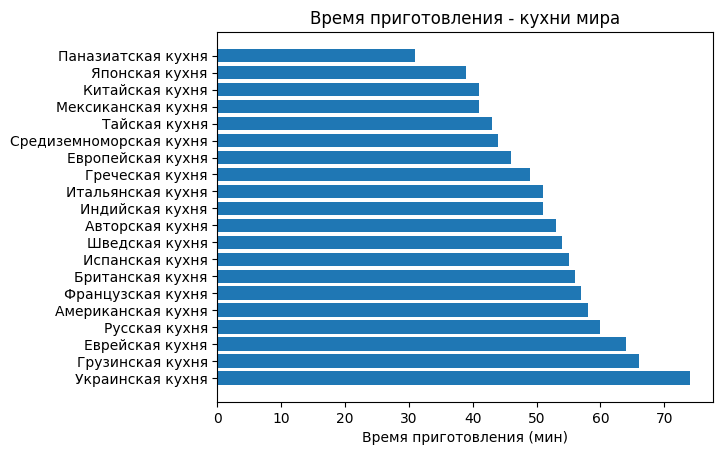

In [9]:
time = sorted(time)
cuisines_t = []
time_per_cuisine = []
for mins, cuisine in time:
    cuisines_t.append(cuisine)
    time_per_cuisine.append(round(mins))

print(time_per_cuisine)
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(cuisines_t))

ax.barh(y_pos, time_per_cuisine)
ax.set_yticks(y_pos)
ax.set_yticklabels(cuisines_t)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Время приготовления (мин)')
ax.set_title('Время приготовления - кухни мира')

plt.show()

In [19]:
def getName(obj,i):
    return obj['ingredients'][i]['name']
def print_comb(comb):
    pprint(getName(comb,0) + " + " +  getName(comb,1))
    
for key, value in cuisines.items():
    if (len(value) > 500):
        print('Кухня ', key)
        analyzer = AprioriAnalyser()
        analyzer.execute_apriori(value)
        good_combination_dao = GoodCombinationDao()

        extracted_combinations = good_combination_dao.find_all()
        combinationsLift = sorted(extracted_combinations, key=lambda x: x["lift"], reverse=True)
        combinationsSupport = sorted(extracted_combinations, key=lambda x: x["support"], reverse=True)
        print('Кол-во комбинаций', len(combinations))
        print('Первый по лифту, второй по саппорту')
        for combinations in [combinationsLift, combinationsSupport]:
            for i in range(0,20):
                comb = combinations[i]
                print_comb(combinations[i])
            for i in range(0,20):
                comb = combinations[i]
                pprint("support=" + str(comb["support"]) + "  lift=" + str(comb["lift"]) + "  confidence=" + str(comb["confidence"]))
            print("***************")

Кухня  Русская кухня
Кол-во комбинаций 696
Первый по лифту, второй по саппорту
'зеленый горошек + икра щуки'
'икра щуки + отварной картофель'
'шпинат + щавель'
'красная икра + отварной картофель'
'отварной картофель + морковь отварная '
'белый перец горошком + гвоздика'
'перепелиное яйцо + морковь отварная '
'белый хлеб + панировочные сухари'
'ванильный стручок + клубника'
'гвоздика + черный душистый перец горошком'
'черный душистый перец + говяжья грудинка'
'зеленый горошек + отварной картофель'
'кардамон + гвоздика'
'зеленый горошек + перепелиное яйцо'
'цукаты + изюм'
'апельсиновый сок + крупная соль'
'имбирь + красный лук'
'корень петрушки + черный душистый перец'
'лук-порей + сельдерей'
'молотый имбирь + молотая корица'
('support=0.003552397868561279  lift=102.36363636363636  '
 'confidence=0.36363636363636365')
'support=0.003552397868561279  lift=75.06666666666668  confidence=1.0'
('support=0.007104795737122558  lift=62.55555555555556  '
 'confidence=0.888888888888889')
'support=0